In [1]:
import pandas as pd
import numpy as np

データを読み込む

In [2]:
df = pd.read_csv('./cbb19.csv')

In [3]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


データクレンジング

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    68 non-null object
SEED          68 non-null float64
dtypes: float64(18), int64(2), object(3)
memory usage: 63.6+ KB


欠損値のある列("POSTSEASON"、"SEED")の欠損値を０に置き換え、値が入っている所は１として置き換える。

In [5]:
df = df.fillna(0)

In [6]:
df = df.replace(df.loc[0:67, ['POSTSEASON', 'SEED']], 1)

In [7]:
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,1,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,1,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,1,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,1,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,Alcorn St.,SWAC,27,10,89.0,112.6,0.0628,45.7,52.7,24.1,...,30.5,36.5,45.0,55.3,31.3,32.1,67.1,-16.7,0,0.0
349,New Hampshire,AE,27,5,83.7,106.1,0.0613,44.0,51.5,18.4,...,21.9,38.0,39.4,52.1,32.6,33.6,67.1,-20.2,0,0.0
350,Chicago St.,WAC,30,3,88.5,117.3,0.0380,44.2,57.8,22.5,...,33.1,33.9,43.5,57.9,30.7,38.5,71.9,-20.9,0,0.0
351,Delaware St.,MEAC,29,6,84.3,112.2,0.0358,40.0,52.4,19.0,...,25.5,39.2,37.7,52.6,29.0,34.7,71.6,-21.7,0,0.0


In [8]:
#df = df.drop(["POSTSEASON", "SEED", '3P_O'], axis=1)

In [9]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,...,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,...,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569,0.192635,0.192635
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,...,4.708719,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550,0.394928,0.394928
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,...,21.900000,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000,0.000000,0.000000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,...,29.900000,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000,0.000000,0.000000
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,...,33.300000,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000,0.000000,0.000000
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,...,35.900000,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000,0.000000,0.000000
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,...,48.100000,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000,1.000000,1.000000


データ加工

カテゴリ変数を二値化する (POSTSEASONが入ってたらSEEDのようなので、SEEDは除外)

In [10]:
df = df.drop(['SEED'], axis=1)

In [11]:
#df = df.drop(['CONF'], axis=1)

In [12]:
#df = pd.get_dummies(df, columns=['POSTSEASON'])
df = pd.get_dummies(df, columns=['CONF', 'POSTSEASON'])

In [13]:
df.head()

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,POSTSEASON_0,POSTSEASON_1
0,Gonzaga,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,...,0,0,0,0,0,0,0,1,0,1
1,Virginia,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,...,0,0,0,0,0,0,0,0,0,1
2,Duke,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,...,0,0,0,0,0,0,0,0,0,1
3,North Carolina,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,...,0,0,0,0,0,0,0,0,0,1
4,Michigan,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,POSTSEASON_0,POSTSEASON_1
G,1.000000,0.668788,0.640437,-0.634291,0.707243,0.317408,-0.498786,-0.316186,0.178514,0.285768,...,-0.055669,-0.084675,0.188306,-0.037068,-0.255733,-0.090679,-0.012208,0.037742,-0.538860,0.538860
W,0.668788,1.000000,0.747631,-0.684400,0.791463,0.587550,-0.647509,-0.457309,0.233868,0.319706,...,-0.003339,0.018418,0.098992,-0.113009,-0.057825,-0.038591,0.019706,0.053287,-0.631103,0.631103
ADJOE,0.640437,0.747631,1.000000,-0.568744,0.875756,0.698596,-0.391780,-0.575551,-0.029380,0.297432,...,0.019776,0.045159,0.241848,-0.237387,-0.147554,0.013881,-0.032364,0.075606,-0.555652,0.555652
ADJDE,-0.634291,-0.684400,-0.568744,1.000000,-0.868742,-0.231538,0.822663,0.224042,-0.263413,-0.263516,...,0.033395,0.031633,-0.228899,0.150880,0.162306,0.114944,0.032839,-0.075159,0.520360,-0.520360
BARTHAG,0.707243,0.791463,0.875756,-0.868742,1.000000,0.513541,-0.664659,-0.451669,0.125869,0.309525,...,-0.003042,0.010621,0.259986,-0.217080,-0.182629,-0.059113,-0.023889,0.079347,-0.580775,0.580775
EFG_O,0.317408,0.587550,0.698596,-0.231538,0.513541,1.000000,-0.181070,-0.359249,-0.123660,-0.112229,...,0.060676,0.145417,0.054848,-0.202539,-0.076431,0.127742,-0.043531,0.079085,-0.347216,0.347216
EFG_D,-0.498786,-0.647509,-0.391780,0.822663,-0.664659,-0.181070,1.000000,0.127329,-0.080295,-0.254627,...,0.048371,0.109659,-0.109002,0.058106,0.097567,0.146129,-0.003076,-0.042516,0.461639,-0.461639
TOR,-0.316186,-0.457309,-0.575551,0.224042,-0.451669,-0.359249,0.127329,1.000000,0.072927,0.195409,...,0.030464,0.017663,0.034526,0.205471,0.196166,-0.129606,0.000360,-0.070036,0.281734,-0.281734
TORD,0.178514,0.233868,-0.029380,-0.263413,0.125869,-0.123660,-0.080295,0.072927,1.000000,0.181559,...,0.027064,-0.010092,0.083151,0.145968,0.156149,-0.202102,0.009360,-0.027250,-0.133374,0.133374
ORB,0.285768,0.319706,0.297432,-0.263516,0.309525,-0.112229,-0.254627,0.195409,0.181559,1.000000,...,0.003773,0.013637,0.201737,0.050541,0.056235,-0.160529,0.036042,-0.076234,-0.225536,0.225536


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()


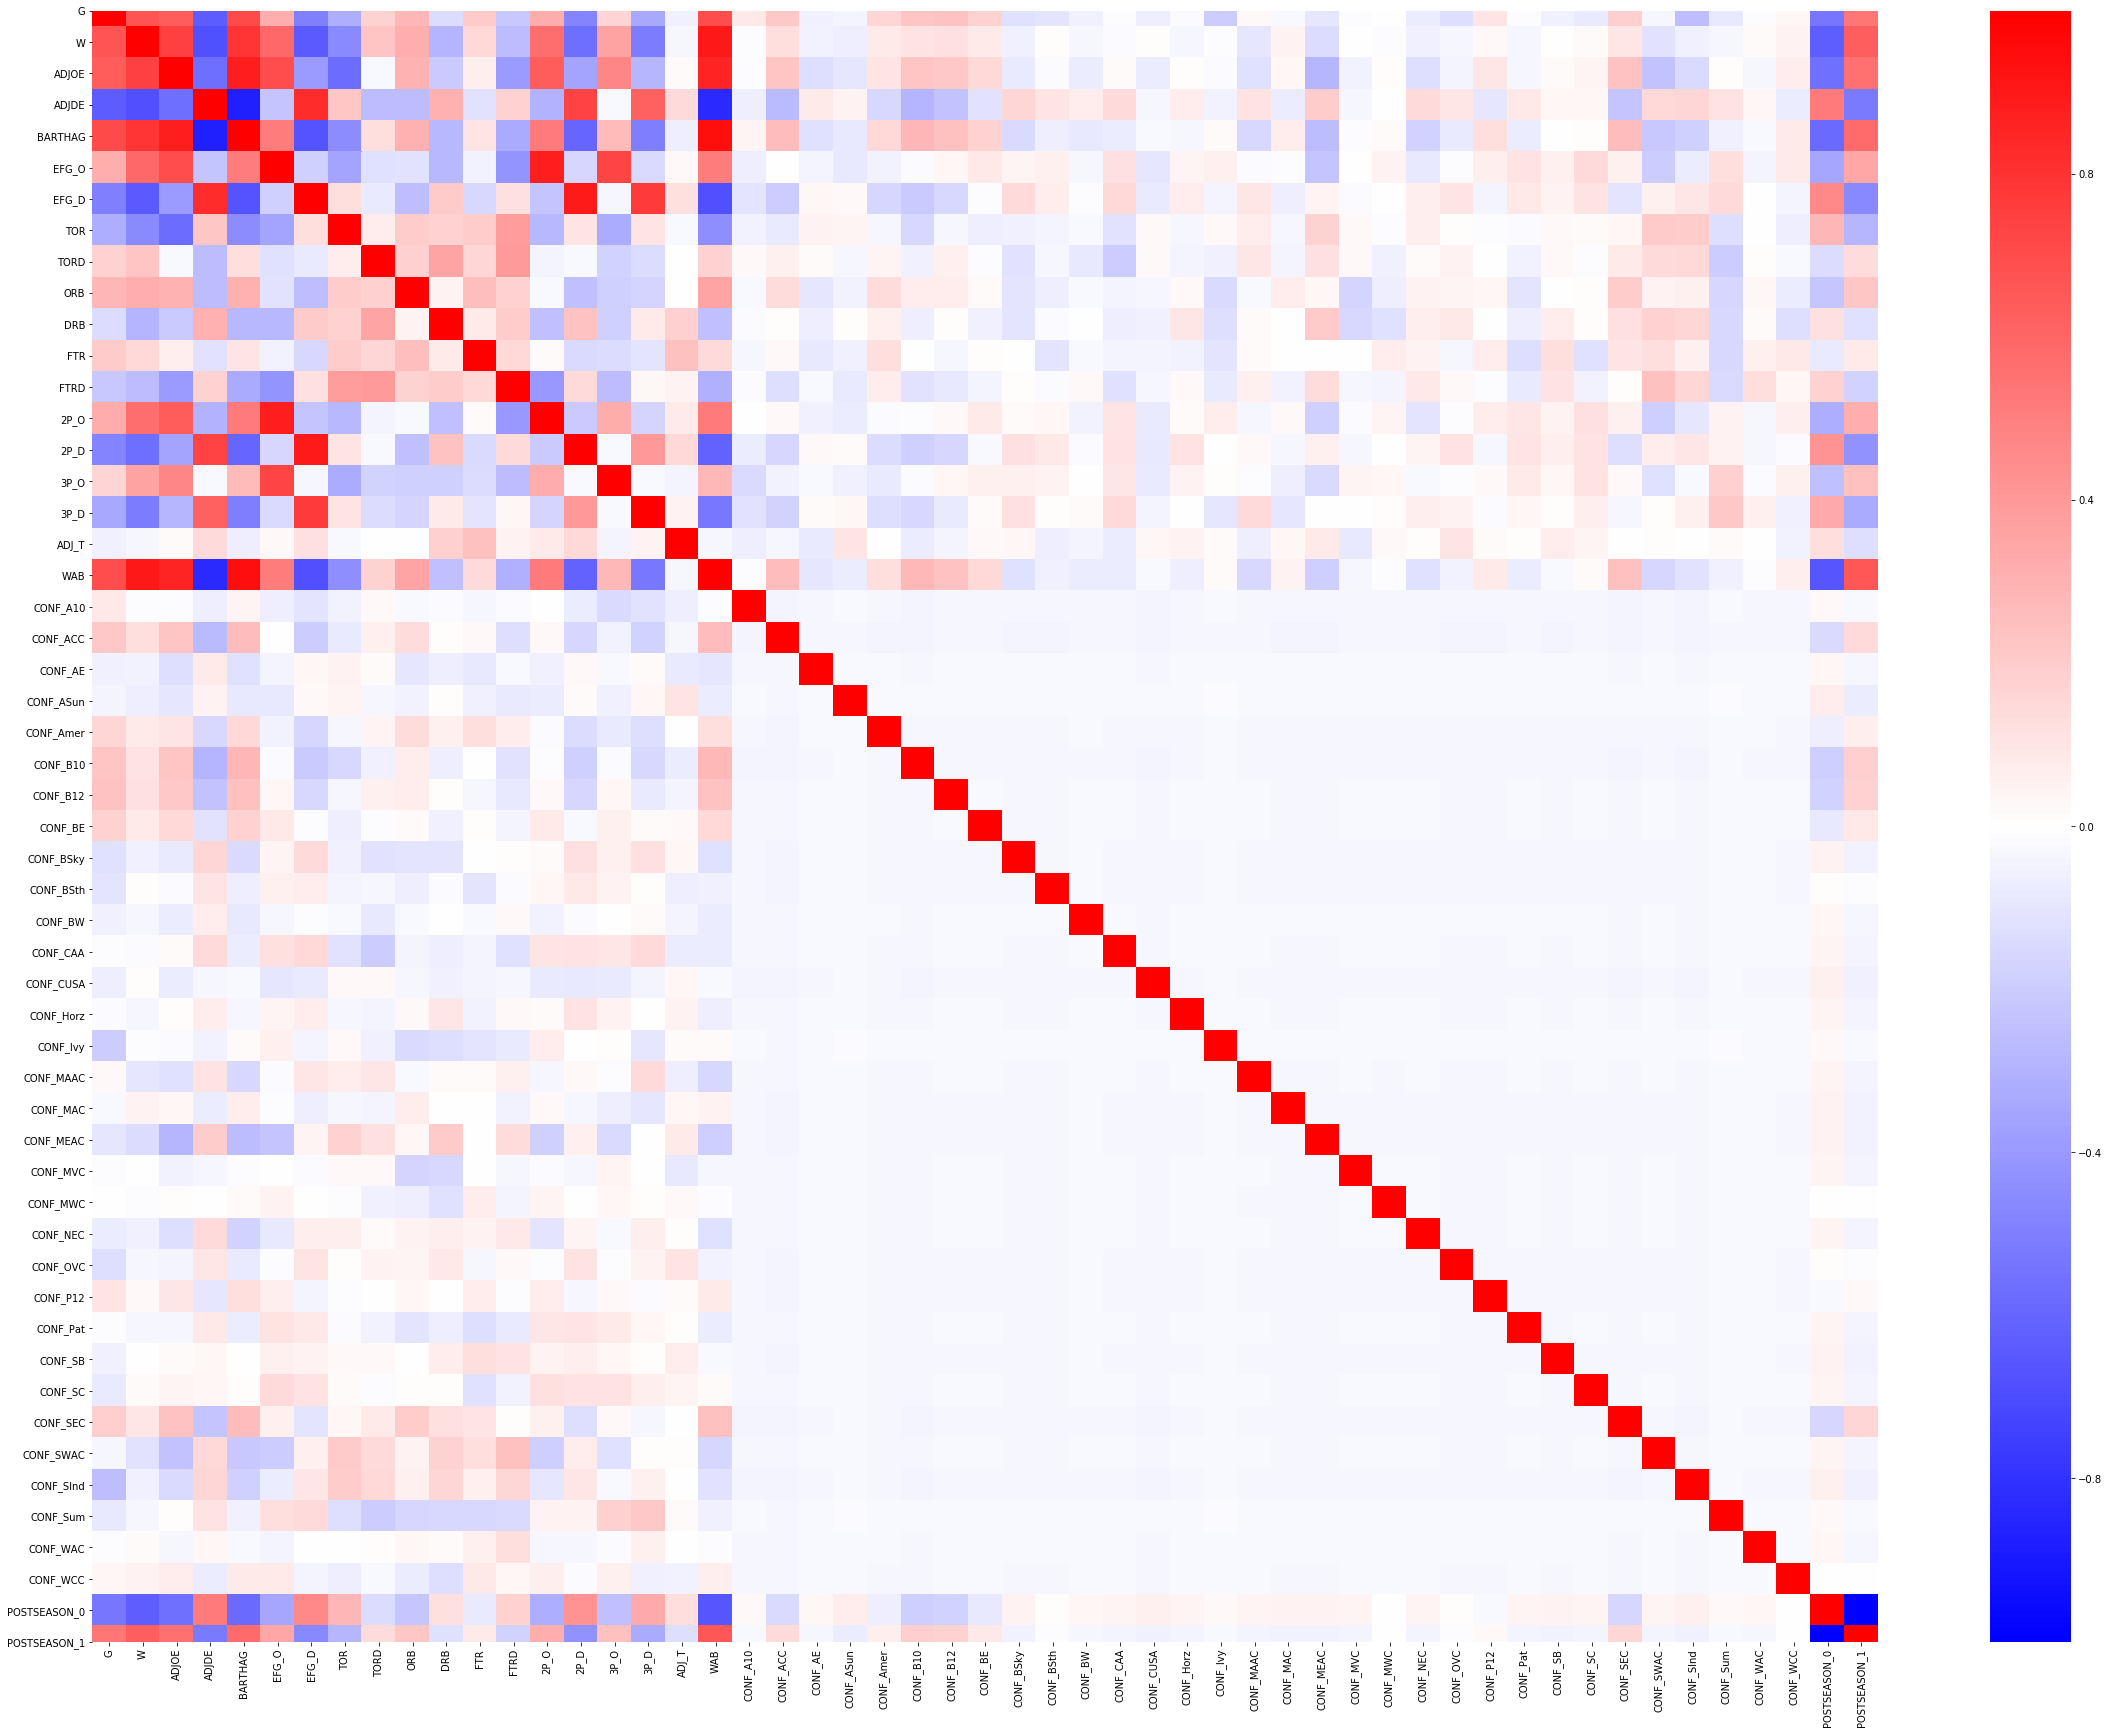

In [16]:
plt.figure(figsize=(40, 30))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='bwr')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 54 columns):
TEAM            353 non-null object
G               353 non-null int64
W               353 non-null int64
ADJOE           353 non-null float64
ADJDE           353 non-null float64
BARTHAG         353 non-null float64
EFG_O           353 non-null float64
EFG_D           353 non-null float64
TOR             353 non-null float64
TORD            353 non-null float64
ORB             353 non-null float64
DRB             353 non-null float64
FTR             353 non-null float64
FTRD            353 non-null float64
2P_O            353 non-null float64
2P_D            353 non-null float64
3P_O            353 non-null float64
3P_D            353 non-null float64
ADJ_T           353 non-null float64
WAB             353 non-null float64
CONF_A10        353 non-null uint8
CONF_ACC        353 non-null uint8
CONF_AE         353 non-null uint8
CONF_ASun       353 non-null uint8
CONF_Amer       353 

学習用と評価用にデータを分割する

In [18]:
# 評価用データとして元データからランダムに30件を抽出
df_test = df.sample(n=30, random_state=0)

In [19]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['TEAM'].isin(df_test['TEAM'])]

データを目的変数と説明変数に分離する

In [20]:
# df_xxx_Xは目的変数を除去したデータ
df_train_X = df_train.drop(['W'], axis=1)
df_test_X = df_test.drop(['W'], axis=1)
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['W']
df_test_y = df_test['W']

In [21]:
# チーム名だけ保持しておく
df_train_team_X = df_train_X['TEAM']
df_test_team_X = df_test_X['TEAM']

オブジェクト型のデータ、重複するPOSTSEASON_0、多重共線性の原因となりうるものを除去する

In [22]:
df_train_X = df_train_X.drop(['TEAM', 'WAB', 'POSTSEASON_0', '3P_O'], axis=1)
df_test_X = df_test_X.drop(['TEAM', 'WAB', 'POSTSEASON_0', '3P_O'], axis=1)

#df_train_X = df_train_X.drop(['TEAM', 'WAB', 'POSTSEASON_0'], axis=1)
#df_test_X = df_test_X.drop(['TEAM', 'WAB', 'POSTSEASON_0'], axis=1)

# 'POSTSEASON_0', '2P_O', '3P_O'
#df_train_X = df_train_X.drop(['TEAM'], axis=1)
#df_test_X = df_test_X.drop(['TEAM'], axis=1)

標準化する

In [23]:
from sklearn.preprocessing import StandardScaler

# 学習用データ
X_sc_df = StandardScaler()

# 元データからパラメータ(平均、分散)を算出する
X_sc_df.fit(df_train_X)
# 元データを変換
df_train_X_std = X_sc_df.transform(df_train_X)

# 評価用データ
X_sc_df = StandardScaler()

# 元データからパラメータ(平均、分散)を算出する
X_sc_df.fit(df_test_X)
# 元データを変換
df_test_X_std = X_sc_df.transform(df_test_X)

# 目的変数は元データが一列しかないので標準化の式に当てはめて変換
df_train_y_std = (df_train_y - df_train_y.mean())/df_train_y.std()
df_test_y_std = (df_test_y - df_test_y.mean())/df_test_y.std()

In [24]:
pd.set_option('display.max_columns', 100)

In [25]:
df_train_X_std

array([[ 2.13967682,  2.832034  , -2.08402935, ..., -0.16929979,
         5.59464029,  2.07245795],
       [ 2.5428948 ,  2.77581798, -2.08402935, ..., -0.16929979,
        -0.1787425 ,  2.07245795],
       [ 2.5428948 ,  2.19960384, -2.19256305, ..., -0.16929979,
        -0.1787425 ,  2.07245795],
       ...,
       [-0.68284902, -2.07281323,  2.16428957, ...,  5.90668172,
        -0.1787425 , -0.48251884],
       [-1.086067  , -2.66308138,  1.37354407, ..., -0.16929979,
        -0.1787425 , -0.48251884],
       [-0.68284902, -2.46632533,  1.71464997, ..., -0.16929979,
        -0.1787425 , -0.48251884]])

In [26]:
print(df_test_X_std)

[[ 1.70374867  2.33234445 -2.11452726 ...  0.          0.
   1.81265393]
 [-0.47124963 -0.50667362 -0.89129023 ...  0.          0.
  -0.55167728]
 [-1.55874878 -1.21201972  0.89651774 ...  0.          0.
  -0.55167728]
 ...
 [ 1.34124895  0.67478111 -1.14221064 ...  0.          0.
  -0.55167728]
 [ 1.34124895  1.52119643 -1.70678158 ...  0.          0.
   1.81265393]
 [-0.10874992  1.39776086  0.14375649 ...  0.          0.
  -0.55167728]]


In [27]:
print(df_train_y_std)

0      2.496457
1      2.810153
2      2.339609
3      1.869065
4      2.025913
         ...   
348   -1.111047
349   -1.895287
350   -2.208983
351   -1.738439
352   -1.581591
Name: W, Length: 323, dtype: float64


In [28]:
print(df_test_y_std)

6      1.942777
140   -0.376188
299   -1.303774
217   -0.221590
90     0.087605
226   -0.376188
114    1.788180
60     0.396801
37     0.860594
293   -0.994578
26     1.633582
283   -0.839981
231    1.015191
316   -1.303774
136    0.705996
210   -0.994578
135    0.396801
279   -1.303774
65     0.705996
331   -1.767567
196   -0.530785
241   -0.066992
45     0.551398
206    0.087605
230   -0.994578
228   -0.994578
76     0.242203
78     0.705996
15     1.324387
100   -0.376188
Name: W, dtype: float64


重回帰分析のためのモデル作成、実行

In [29]:
from sklearn.linear_model import LinearRegression

データ分割

In [30]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [31]:
#学習データと予測データに分割(学習データ:予測データ=7:3)
#X_train,X_pred,y_train,y_pred = train_test_split(X_learn_std,y_learn_std,random_state=1,test_size=0.3)
X_train_data,X_pred_data,y_train_data,y_pred_data = train_test_split(df_train_X_std,df_train_y_std,test_size=0.3)

モデルの作成と実行

In [32]:
# 線形回帰モデルへ当てはめる
linreg.fit(X_train_data,y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# 予測実行
pred_result = linreg.predict(X_pred_data)

In [34]:
# 予測結果を逆標準化
# 予測値
y_pred_data.predict = pred_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_pred_data * df_train_y.std() + df_train_y.mean()

予実結果の可視化

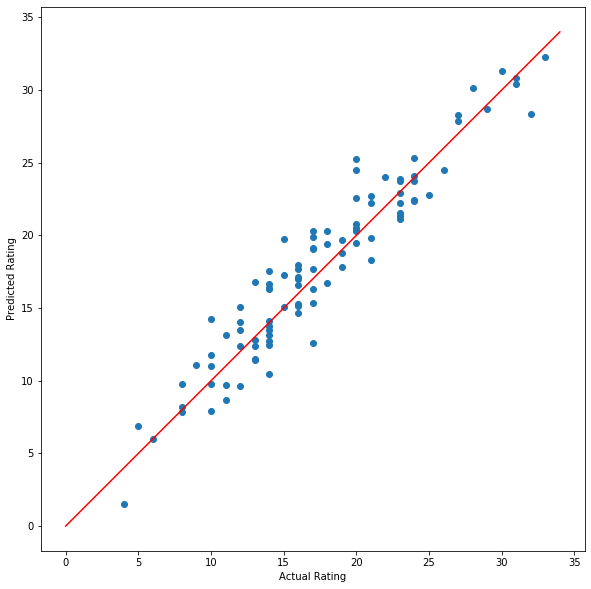

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_pred_data.predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 35)
y=x
plt.plot(x,y,color="red")

誤差の計測

In [36]:
rmse = np.sqrt(sum((y_pred_val - y_pred_data.predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  1.9421612887831663


説明変数の影響度を確認

CONF_A10    -0.080767
FTRD        -0.083421
ORB          0.083875
TOR         -0.085348
CONF_P12    -0.086158
CONF_Amer   -0.087918
CONF_SEC    -0.111820
CONF_BSky    0.116067
DRB         -0.131493
ADJDE        0.134322
CONF_Slnd    0.134668
CONF_B12    -0.150934
CONF_ACC    -0.160076
CONF_B10    -0.178489
2P_D        -0.185485
G            0.208592
3P_D        -0.226571
TORD         0.252892
ADJOE        0.306530
BARTHAG      0.337199
Name: Coef, dtype: float64

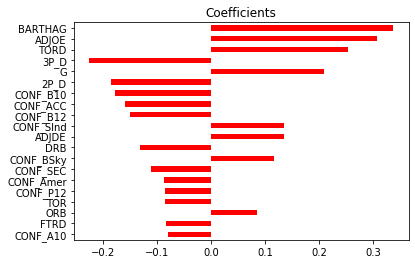

In [37]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_X.columns
coef_df = coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

全学習データに対して重回帰分析を実施する

In [38]:
linreg_all = LinearRegression()

In [39]:
#lr_model_all = linreg_all.fit(X_learn_std,y_learn_std)
linreg_all.fit(df_train_X_std,df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_test_result = linreg_all.predict(df_test_X_std)

CONF_P12       -0.077389
CONF_MEAC       0.081796
CONF_BSky       0.085670
POSTSEASON_1    0.086268
EFG_O           0.107210
ORB             0.110670
TOR            -0.115334
3P_D            0.120343
DRB            -0.122272
CONF_Slnd       0.130795
CONF_B12       -0.139664
CONF_SEC       -0.141329
CONF_ACC       -0.156650
CONF_B10       -0.160562
BARTHAG         0.181973
G               0.214301
TORD            0.221544
2P_D            0.250135
ADJOE           0.320835
EFG_D          -0.658048
Name: Coef, dtype: float64

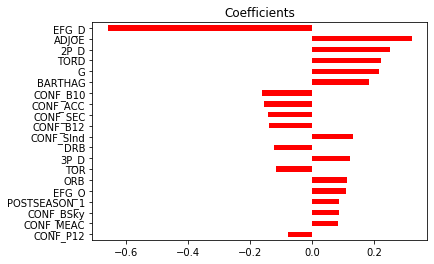

In [41]:
coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_train_X.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

In [42]:
# 予測結果を逆標準化
df_test_y.predict = y_test_result * df_test_y.std() + df_test_y.mean()
y_test_result_val = df_test_y

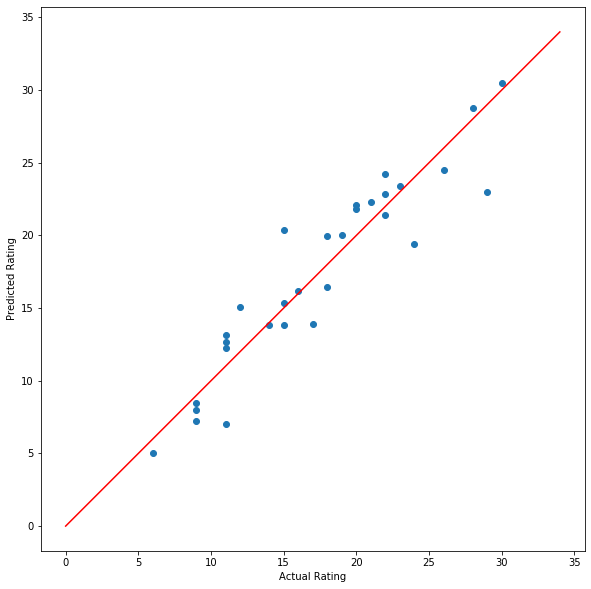

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_result_val, df_test_y.predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 35)
y=x
plt.plot(x,y,color="red")

In [44]:
rmse = np.sqrt(sum((y_test_result_val - df_test_y.predict) ** 2) / len(y_test_result_val))
print("RMSE = ", rmse)

RMSE =  2.325315029168657
